In [1]:
from IPython.display import display, Image, Audio

import cv2  # We're using OpenCV to read video, to install !pip install opencv-python
import base64
import requests
import os
import time
from dotenv import load_dotenv

# .envファイルから環境変数を読み込む
load_dotenv()

# .envファイルからAPIキーを読み込む
YOUR_GOOGLE_AI_STUDIO_API_KEY = os.getenv("GOOGLE_AI_STUDIO_API_KEY")
# or 
# YOUR_GOOGLE_AI_STUDIO_API_KEY = XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [2]:
from openai import OpenAI
import httpx
client = OpenAI(api_key = YOUR_GOOGLE_AI_STUDIO_API_KEY)

base_url = httpx.URL("http://localhost:8080/v1/")
client._base_url= base_url

In [3]:
completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a poetic assistant, skilled in explaining complex programming concepts with creative flair."},
    {"role": "user", "content": "Compose a poem that explains the concept of recursion in programming."}
  ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content="In the realm of code, where logic resides,\nRecursion's dance, a tale it confides.\nA function's call, a journey it starts,\nTo delve in itself, uncharted parts.\n\nLike a mirror reflecting its own gaze,\nRecursion embarks on labyrinthine ways.\nIt breaks down tasks, in fragments small,\nSolving each piece, answering the call.\n\nA stack it climbs, like a mountain so high,\nEach nested call reaching for the sky.\nBut like a river that finds its way,\nRecursion finds the end of its endless fray.\n\nWith each step, the problem unravels,\nUnveiling solutions, like stars that unravel.\nThe base case reached, the journey's end draws near,\nA moment of clarity, casting off fear.\n\nLike a phoenix rising from its own fire,\nRecursion emerges, soaring higher.\nThe results unfurl, the answers unfold,\nA tapestry woven, a story retold.\n\nIn its elegance, recursion finds grace,\nA dance of self-reference, a harmonious embrace.\nIn the realm of code, its power resid

In [4]:
# Using GPT's visual capabilities to get a description of a video
video = cv2.VideoCapture("../data/Bouldering.mp4")

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")

537 frames read.


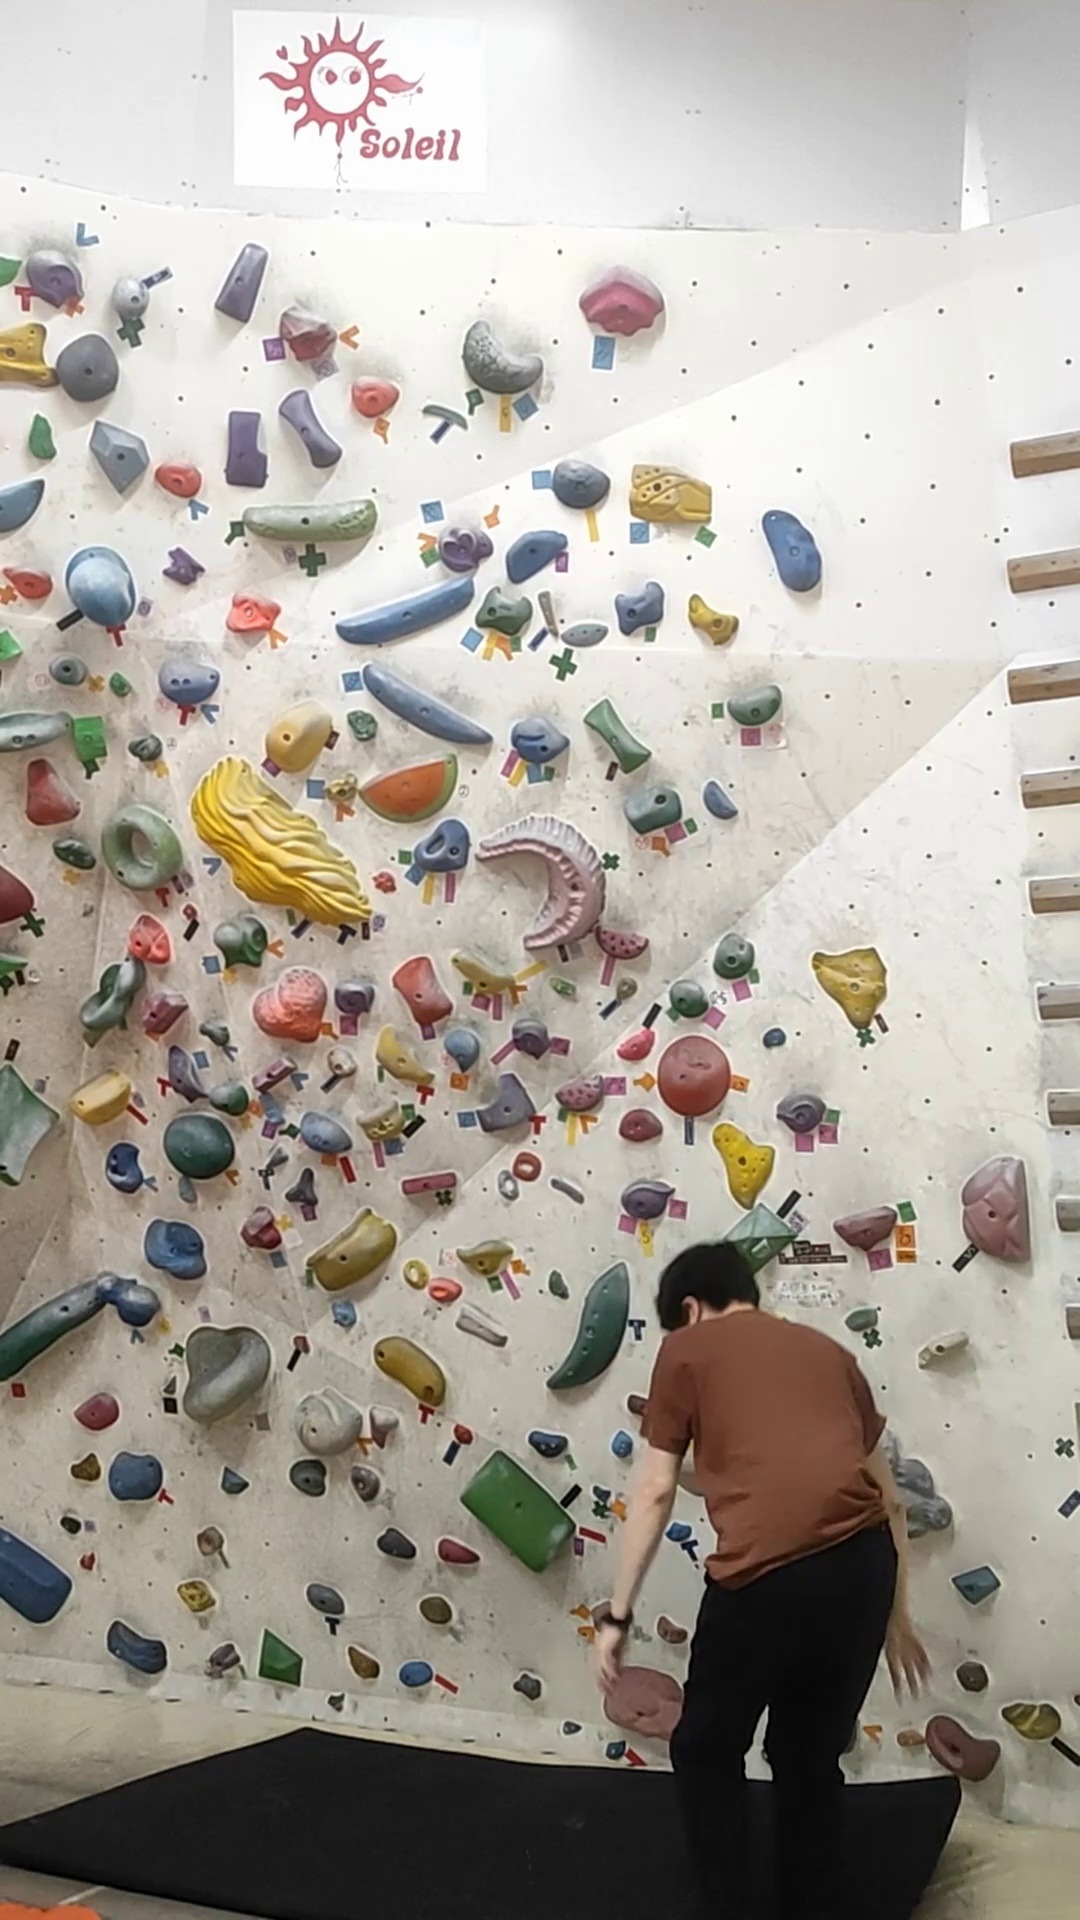

In [5]:
# Display frames to make sure we've read them in correctly:
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)

In [6]:
# Once we have the video frames, we craft our prompt and send a request to GPT

# プロンプトメッセージを定義
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "These are frames from a video that I want to upload. Generate a compelling description that I can upload along with the video."},
            *map(lambda x: {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{x}"}}, base64Frames[0::100]),
        ],
    },
]

# リクエストパラメータを設定
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 200,
}

# デバッグ情報の表示
print("First content item keys:", PROMPT_MESSAGES[0]['content'][0].keys())
print("Last content item keys:", PROMPT_MESSAGES[0]['content'][-1].keys())

# 最後の画像URLの先頭50文字を表示
print("Start of last image URL:", PROMPT_MESSAGES[0]['content'][-1]['image_url']['url'][:50])

# contentリストの長さを表示
print("Number of content items:", len(PROMPT_MESSAGES[0]['content']))

# APIリクエストを送信し、結果を表示
result = client.chat.completions.create(**params)
print("Generated description:\n", result.choices[0].message.content)

First content item keys: dict_keys(['type', 'text'])
Last content item keys: dict_keys(['type', 'image_url'])
Start of last image URL: data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD
Number of content items: 7
Generated description:
  Check out this video of me sending my first V7! It was a long and challenging journey, but I'm so proud of myself for finally making it happen. Thanks to everyone who supported me along the way!

#climbing #bouldering #v7 #send #firstsend #proud #journey #challenge #nevergiveup #dreamscometrue


# Generated description
 This video shows a person rock climbing on an indoor climbing wall. The climber is using their hands and feet to grip onto the wall and move upwards. The wall is covered in colorful climbing holds of different shapes and sizes. The climber is wearing a brown shirt and black pants. They are also wearing a harness and climbing shoes. The climber is focused and determined as they make their way up the wall. They are using their upper body strength and core strength to pull themselves up. The climber is also using their problem-solving skills to figure out the best way to reach the top of the wall. This video is a great example of how rock climbing can be a challenging and rewarding activity. It is also a great way to get in shape and have fun.

---

この動画は、屋内のクライミングウォールでロッククライミングをする人を撮影したものである。クライマーは手と足を使って壁をつかみ、上へ上へと進んでいる。壁には、様々な形や大きさのカラフルなクライミングホールドが設置されている。クライマーは茶色のシャツと黒いズボンを着ている。ハーネスとクライミングシューズも履いている。クライマーは集中し、決意を固めて壁を登っている。上半身の力と体幹の力を使って体を引き上げている。クライマーはまた、壁の頂上に到達するための最善の方法を見つけ出すために、問題解決能力も使っている。このビデオは、ロッククライミングがいかに挑戦的でやりがいのあるアクティビティであるかを示す好例だ。ロッククライミングは、シェイプアップや楽しみにも最適だ。